**Alunos:**
*   Daniel Augusto Muller
*   Luan Escudeiro

1 - Com a mesma base de dados do trabalho 1 crie 10 redes neurais e treine elas (basei-se no código linear-regr-gd2.ipynb)

2 - Avalie e descubra quais das 10 redes tem menor erro

Calcule as métricas MSE e MAE, comparando os valores estimados com os valores reais

4 - Plote a superfície de erro real e a melhor superfície de erro estimada pela melhor rede

5 - Cole o link do colab na plataforma classroom (sala d7nggkk)

Habilitar a opção: compartilhar -> qualquer um com link pode visualizar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from random import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error #mean_squared_error(y,y_pred, squared=False)
from sklearn.metrics import mean_absolute_error #mean_absolute_error(y,y_pred)
from sklearn.preprocessing import StandardScaler

**Preparing BodyFatness Dataset with Weight and Abdomen Circumference**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UTFPR/Períodos/2022.2/Sistemas_Inteligentes/Colab Notebooks/bodyfat.csv')

df['Weight'] = df['Weight'].div(2.205).round(2) #lbs to kg
#print(df.head()) #252 samples

X = df.iloc[:,[3,7]].values #all rows but only columns Weight(kg) and Abdomen Circumference(cm)
print("X:",X.shape,"\nWeight(kg) Abdomen(cm)\n",X[:5],"...") #ispection of first 5 rows
y_true = df['BodyFat'].values
print("\ny_true:",y_true.shape,"\n Body Fatness(%)\n",y_true[:5],"...")
y_true = np.asarray(y_true.reshape(252,1))

X: (252, 2) 
Weight(kg) Abdomen(cm)
 [[ 69.95  85.2 ]
 [ 78.57  83.  ]
 [ 69.84  87.9 ]
 [ 83.79  86.4 ]
 [ 83.56 100.  ]] ...

y_true: (252,) 
 Body Fatness(%)
 [12.3  6.1 25.3 10.4 28.7] ...


**Normalizing**

In [4]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)
standard_y_true = scaler.fit_transform(y_true)

print("standard_X:",standard_X.shape,"\nWeight(kg) Abdomen(cm)\n",standard_X[:5],"...") #ispection of first 5 rows
print("\nstandard_y_true:",standard_y_true.shape,"\n Body Fatness(%)\n",standard_y_true[:5],"...")

standard_X: (252, 2) 
Weight(kg) Abdomen(cm)
 [[-0.84158101 -0.68353321]
 [-0.19355653 -0.88796263]
 [-0.84985046 -0.43264256]
 [ 0.19886664 -0.57202626]
 [ 0.18157597  0.69171924]] ...

standard_y_true: (252, 1) 
 Body Fatness(%)
 [[-0.82024615]
 [-1.56257271]
 [ 0.73624504]
 [-1.04773332]
 [ 1.14332735]] ...


**Adding bias to X**

In [5]:
bias_value = 1
bias = np.ones((len(X[:,0]),1)) #column with 1's
#X = np.hstack((X, bias_value * bias))
#print("X:",X.shape,"\n Weight  Abdomen  Bias\n",X[:5],"...") #ispection of first 5 rows

standard_X = np.hstack((standard_X, bias_value * bias))
print("standard_X:",standard_X.shape,"\n Weight  Abdomen  Bias\n",standard_X[:5],"...") #ispection of first 5 rows

standard_X: (252, 3) 
 Weight  Abdomen  Bias
 [[-0.84158101 -0.68353321  1.        ]
 [-0.19355653 -0.88796263  1.        ]
 [-0.84985046 -0.43264256  1.        ]
 [ 0.19886664 -0.57202626  1.        ]
 [ 0.18157597  0.69171924  1.        ]] ...


In [6]:
#remove bias column

#X = np.delete(X, 2, 1) #remove column with index 2
#print("X:",X.shape,"\n Weight  Abdomen  Bias\n",X[:5],"...") #ispection of first 5 rows

#standard_X = np.delete(standard_X, 2, 1) #remove column with index 2
#print("X:",standard_X.shape,"\n Weight  Abdomen  Bias\n",standard_X[:5],"...") #ispection of first 5 rows

In [7]:
# Define the neural network function y = x * w
def nn(X, w):
    return X.dot(w)

def activation(y):
    z = y
    return z

# Define the cost function
def cost(y_pred, y_true):
    xi = (0.5*(y_pred - y_true)**2).sum()
    return xi

# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, X, y_true):
    gradient = X * (activation(nn(X, w).reshape(252,1)) - y_true)
    #print("Gradient: ",gradient)
    return gradient

# define the update function delta w. Batch formula
def delta_w(w, X, y_true, learning_rate):
    delta_w = learning_rate * gradient(w, X, y_true).sum()
    #print("Delta W: ",delta_w)
    return delta_w

def batch_train(X, y_true, weights, learning_rate):
  # Start performing the gradient descent updates, and print the weights and cost:  
  w_cost = []
  w_cost.append(cost(nn(X, weights), y_true)) # List to store the costs

  nb_of_iterations = 100

  for i in range(nb_of_iterations):
      dw = delta_w(weights, X, y_true, learning_rate)  # Get the delta w update
      weights = weights - dw  # Update the current weight parameter
      #print("Weights: ",weights)
      w_cost.append(cost(activation(nn(X, weights)), y_true))  # Add weight,cost to list

  print("Cost:\n",w_cost)
  return weights

**Network Training**

In [17]:
number_nn = 10
learning_rate = 0.001
results = []

for i in range(number_nn):
  w = np.random.rand(1,3)
  w = np.reshape(w,3)
  #print("Initial Random Weights: ",w) #print initial weights
  results.append(batch_train(standard_X, standard_y_true, w, learning_rate))
  #print("Weights for NN(",i,"): \nw0 = ",results[i][0]," w1 = ",results[i][1]," w2 = ",results[i][2],"\n")

Cost:
 [62461.130549575086, 43184.816545281385, 46330.95210802895, 45658.35197803916, 45793.92320095687, 45766.27276508113, 45771.89864230858, 45770.753415951105, 45770.986519612736, 45770.93907185709, 45770.94872970713, 45770.946763878725, 45770.94716401754, 45770.94708257042, 45770.94709914875, 45770.947095774274, 45770.94709646114, 45770.947096321324, 45770.94709634978, 45770.947096343996, 45770.94709634518, 45770.947096344935, 45770.947096344986, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.94709634497, 45770.9470963

**Getting the best network**

In [23]:
y_pred_list = []
mse_list = []
mae_list = []

for i in range(number_nn):
  y_pred_list.append(results[i][0]*standard_X[:,0] + results[i][1]*standard_X[:,1] - results[i][2]*standard_X[:,2])
  mse_list.append(mean_squared_error(standard_y_true, y_pred_list[i], squared=False))
  mae_list.append(mean_absolute_error(standard_y_true, y_pred_list[i]))

print("MSE: ",mse_list)
print("MAE: ",mae_list)
pos = [np.argmin(mae_list), np.argmin(mse_list)]

print("\nBest Weights: ",results[pos[0]])

MSE:  [0.6748139765211058, 0.9552357001225155, 0.7558644176245491, 0.7290141203790949, 0.7811552952183127, 0.8626109909526269, 0.9528062744054124, 0.6852076445230785, 0.6147894321500049, 0.6739955593081178]
MAE:  [0.5502262104358259, 0.7724855030665079, 0.6139629828516902, 0.5941846370227075, 0.6348690192443117, 0.7019802418183214, 0.7776113371445768, 0.5621827925846936, 0.5057648563414485, 0.5516492941131417]

Best Weights:  [0.08187969 0.62765805 0.0862428 ]


**Plotting Y True x Pred**

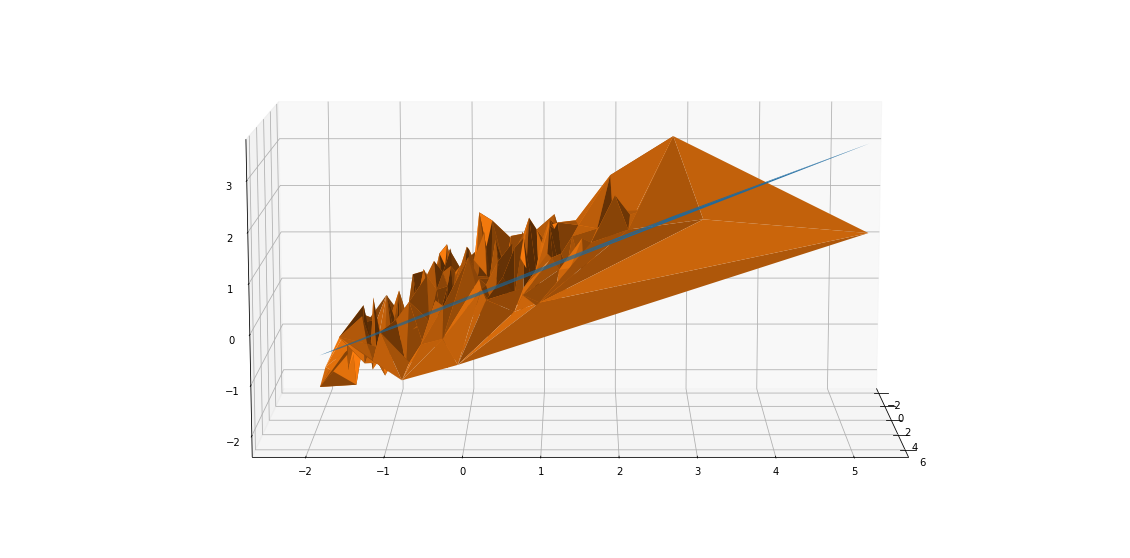

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
#ax.plot_trisurf(X[:,0], X[:,1], y_pred_list[pos[0]])
#ax.plot_trisurf(X[:,0], X[:,1], y_true[:,0])

ax.plot_trisurf(standard_X[:,0], standard_X[:,1], y_pred_list[pos[0]])
ax.plot_trisurf(standard_X[:,0], standard_X[:,1], standard_y_true[:,0])

ax.view_init(elev=10, azim=0)

plt.show()